----------------------------------------------------------
## 머신러닝을 활용한 선거조사(전화조사) 무응답 보정
----------------------------------------------------------
- ID : 응답자 구별코드
- SIDO : 시도 구분
- AREA : 권역별
- SEX  : 성별
- AGE1 : 연령(숫자)
- AGE  : 연령대
- Q1   : 대통령 지지 후보(재질문 통합)  <-- target
- Q2   : 지지 후보 결정 시기
- Q3   : 지지 후보 선택 이유
- Q4   : 지지 정당(재질문 통합)
- DQ1  : 정치적 이념성향
- DQ2  : 과거 대선 지지
- DQ3  : 과거 총선 정당 지지
- DQ4  : 직업
- DQ5  : 소득
----------------------------------------------------------

In [ ]:
#############################################################################################
## 코랩 한글깨짐 해결
#############################################################################################
##1) 나눔폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

# #2) 런타임 재시작

#3) matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#############################################################################################
## 데이터 불러오기
#############################################################################################

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/_project/전화조사데이터.xlsx')

## warnings 메시지 숨김
import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
## 지지후보 응답데이터 : 2757
df1 = df[df.TYPE == 1]

## 지지후보 없음/무응답데이터 : 329
df2 = df[df.TYPE == 2]

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2757 entries, 0 to 3085
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2757 non-null   int64  
 1   SIDO    2757 non-null   int64  
 2   AREA    2757 non-null   int64  
 3   SEX     2757 non-null   int64  
 4   AGE1    2757 non-null   int64  
 5   AGE     2757 non-null   int64  
 6   Q1      2757 non-null   int64  
 7   Q2      2757 non-null   float64
 8   Q3      2757 non-null   float64
 9   Q4      2757 non-null   int64  
 10  DQ1     2757 non-null   int64  
 11  DQ2     2757 non-null   int64  
 12  DQ3     2757 non-null   int64  
 13  DQ4     2757 non-null   int64  
 14  DQ5     2757 non-null   int64  
 15  TYPE    2757 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 366.2 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 3 to 3077
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      329 non-null    int64  
 1   SIDO    329 non-null    int64  
 2   AREA    329 non-null    int64  
 3   SEX     329 non-null    int64  
 4   AGE1    329 non-null    int64  
 5   AGE     329 non-null    int64  
 6   Q1      329 non-null    int64  
 7   Q2      0 non-null      float64
 8   Q3      0 non-null      float64
 9   Q4      329 non-null    int64  
 10  DQ1     329 non-null    int64  
 11  DQ2     329 non-null    int64  
 12  DQ3     329 non-null    int64  
 13  DQ4     329 non-null    int64  
 14  DQ5     329 non-null    int64  
 15  TYPE    329 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 43.7 KB


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3086 entries, 0 to 3085
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3086 non-null   int64  
 1   SIDO    3086 non-null   int64  
 2   AREA    3086 non-null   int64  
 3   SEX     3086 non-null   int64  
 4   AGE1    3086 non-null   int64  
 5   AGE     3086 non-null   int64  
 6   Q1      3086 non-null   int64  
 7   Q2      2757 non-null   float64
 8   Q3      2757 non-null   float64
 9   Q4      3086 non-null   int64  
 10  DQ1     3086 non-null   int64  
 11  DQ2     3086 non-null   int64  
 12  DQ3     3086 non-null   int64  
 13  DQ4     3086 non-null   int64  
 14  DQ5     3086 non-null   int64  
 15  TYPE    3086 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 385.9 KB


,ID,SIDO,AREA,SEX,AGE1,AGE,Q1,Q2,Q3,Q4,DQ1,DQ2,DQ3,DQ4,DQ5,TYPE
0,1,8,2,2,55,4,3,3.0,4.0,3,3,1,2,9,2,1
1,2,1,1,2,40,3,1,6.0,1.0,1,3,2,2,6,3,1
2,3,8,2,1,68,5,3,6.0,1.0,3,1,1,3,5,1,1
3,4,1,1,2,66,5,9,NaN,NaN,4,9,1,1,5,1,2
4,5,2,6,2,46,3,1,6.0,2.0,1,3,2,2,6,2,1


In [ ]:
#######################################################################################
## 데이터 결측치, 이상치 확인
#######################################################################################

## 결측치 확인
df.isna().sum()

ID        0
SIDO      0
AREA      0
SEX       0
AGE1      0
AGE       0
Q1        0
Q2      329
Q3      329
Q4        0
DQ1       0
DQ2       0
DQ3       0
DQ4       0
DQ5       0
TYPE      0
dtype: int64

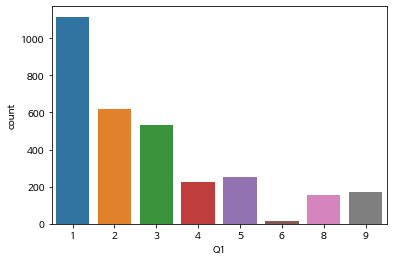

In [ ]:
## 종속변수확인 => 다중분류 모델 적용 필요함
sns.countplot(x="Q1", data=df)
plt.show()

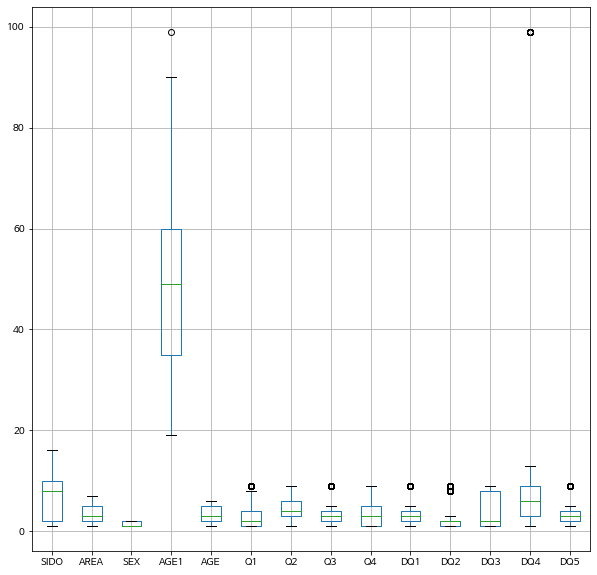

In [ ]:
## 지지후보 응답데이터에서  이상치 확인
df11 = df.drop(columns = ['ID'])

data1 = df11.iloc[:,:-1]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
data1.boxplot(ax=ax)


In [ ]:
## Q3, DQ1, DQ2, DQ4 변수에 극단치 있음
df['Q3'].value_counts()   # 9값 모르겠다 (사례수 222개)


2.0    671
1.0    586
3.0    508
5.0    420
4.0    350
9.0    222
Name: Q3, dtype: int64

In [ ]:
df['DQ1'].value_counts()  # 9값 모르겠다 (사례수 385개)


3    950
4    745
2    717
9    385
1    149
5    140
Name: DQ1, dtype: int64

In [ ]:
df['DQ2'].value_counts()  # 9값 모르겠다 (사례수 111개)


1    1202
2    1150
8     505
3     118
9     111
Name: DQ2, dtype: int64

In [ ]:
df['DQ4'].value_counts()  # 99값 모르겠다 (사례수 14개)


9     661
6     652
2     544
10    235
3     189
12    181
8     155
4     131
5     107
1      84
11     64
7      45
13     24
99     14
Name: DQ4, dtype: int64

In [ ]:
## 99 '모르겠다' 값이 14개 있는데, 사례수도 적기도 하고 13 '기타'가 있어서 99값을 13으로 수정
df.loc[(df.DQ4==99),'DQ4']=13
df['DQ4'].value_counts()

9     661
6     652
2     544
10    235
3     189
12    181
8     155
4     131
5     107
1      84
11     64
7      45
13     38
Name: DQ4, dtype: int64

In [ ]:
df['DQ5'].value_counts()  # 9값 모르겠다 (사례수 377개)

2    810
3    633
1    627
9    377
5    343
4    296
Name: DQ5, dtype: int64

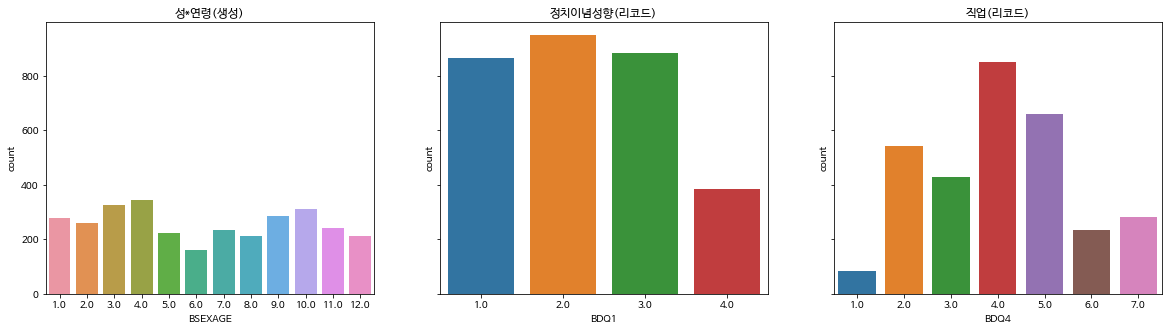

In [ ]:
#######################################################################################
## 추가변수 생성
#######################################################################################
 
## 성(SEX) & 연령(AGE) 으로 성연령(BSEXAGE) 변수 생성
df.loc[(df.SEX==1) & (df.AGE==1),'BSEXAGE']=1     #1.남-20대
df.loc[(df.SEX==1) & (df.AGE==2),'BSEXAGE']=2     #2.남-30대
df.loc[(df.SEX==1) & (df.AGE==3),'BSEXAGE']=3     #3.남-40대
df.loc[(df.SEX==1) & (df.AGE==4),'BSEXAGE']=4     #4.남-50대
df.loc[(df.SEX==1) & (df.AGE==5),'BSEXAGE']=5     #5.남-60대
df.loc[(df.SEX==1) & (df.AGE==6),'BSEXAGE']=6     #6.남-70대 이상

df.loc[(df.SEX==2) & (df.AGE==1),'BSEXAGE']=7     #7.여-20대
df.loc[(df.SEX==2) & (df.AGE==2),'BSEXAGE']=8     #8.여-30대
df.loc[(df.SEX==2) & (df.AGE==3),'BSEXAGE']=9     #9.여-40대
df.loc[(df.SEX==2) & (df.AGE==4),'BSEXAGE']=10    #10.여-50대
df.loc[(df.SEX==2) & (df.AGE==5),'BSEXAGE']=11    #11.여-60대
df.loc[(df.SEX==2) & (df.AGE==6),'BSEXAGE']=12    #12.여-70대 이상


## DQ1(정치이념성향) 세부적인 분류를 묶어서 변수 생성
df.loc[(df.DQ1==1) | (df.DQ1==2),'BDQ1']=1   #1.보수
df.loc[(df.DQ1==3),'BDQ1']=2                 #2.중도
df.loc[(df.DQ1==4) | (df.DQ1==5),'BDQ1']=3   #3.진보
df.loc[(df.DQ1==9),'BDQ1']=4                 #4.모름


## DQ4(직업) 세부적인 분류를 묶어서 변수 생성
df.loc[(df.DQ4==1),'BDQ4']=1                                   #1.농/임/어업
df.loc[(df.DQ4==2),'BDQ4']=2                                   #2.자영업
df.loc[(df.DQ4==3) | (df.DQ4==4) | (df.DQ4==5),'BDQ4']=3       #3.블루칼라
df.loc[(df.DQ4==6) | (df.DQ4==7) | (df.DQ4==8),'BDQ4']=4       #4.화이트칼라
df.loc[(df.DQ4==9),'BDQ4']=5                                   #5.가정주부
df.loc[(df.DQ4==10),'BDQ4']=6                                  #6.학생
df.loc[(df.DQ4==11) | (df.DQ4==12) | (df.DQ4==13),'BDQ4']=7    #7.무직/은퇴/기타
df.loc[(df.DQ4==99),'BDQ4']=8                                  #8.모름



f, axes=plt.subplots(1, 3, figsize=(20, 5), sharex=False, sharey=True)
axes[0].set_title('성*연령(생성)',fontsize=12)
sns.countplot(data=df, x="BSEXAGE",ax=axes[0])
axes[1].set_title('정치이념성향(리코드)',fontsize=12)
sns.countplot(data=df, x="BDQ1",ax=axes[1])
axes[2].set_title('직업(리코드)',fontsize=12)
sns.countplot(data=df, x="BDQ4", ax=axes[2])
plt.show()


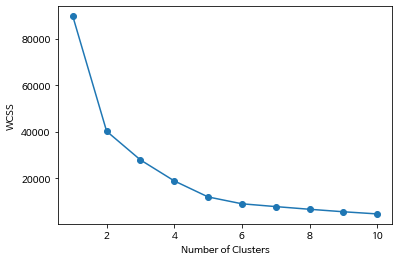

In [ ]:
## K-mean 생성변수 (변수중요도에서 높게 나온 'Q4', 'SIDO' 변수로 시도함)
from sklearn.cluster import KMeans
from scipy.stats import norm, boxcox
from scipy import stats

clus = df[['Q4', 'SIDO']].values

def elbow():
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clus)
    wcss.append(kmeans.inertia_)

  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
  plt.plot(range(1,11), wcss, marker='o')
  plt.show()

elbow()


In [ ]:
## 클러스터 6개로 선택
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clus)

print(Y)
print(np.unique(Y))

[1 0 1 ... 5 3 0]
[0 1 2 3 4 5]


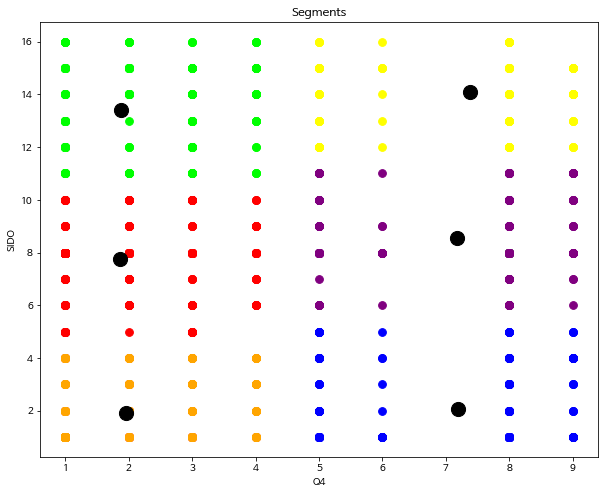

In [ ]:
## 클러스터 그래프 확인
plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='purple', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='lime', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')
plt.scatter(clus[Y==5,0], clus[Y==5,1], s=60, c='yellow', label='Cluster 6')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('Segments')
plt.xlabel('Q4')
plt.ylabel('SIDO')
plt.show()

In [ ]:
## 세그먼트 추가변수생성
# segment 1
df.loc[(df.SIDO==1) & (df.Q4==1),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==1),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==1),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==1),'SEG']=1

df.loc[(df.SIDO==1) & (df.Q4==2),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==2),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==2),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==2),'SEG']=1

df.loc[(df.SIDO==1) & (df.Q4==3),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==3),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==3),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==3),'SEG']=1

df.loc[(df.SIDO==1) & (df.Q4==4),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==4),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==4),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==4),'SEG']=1

# segment 2
df.loc[(df.SIDO==5) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==1),'SEG']=2

df.loc[(df.SIDO==5) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==2),'SEG']=2

df.loc[(df.SIDO==5) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==3),'SEG']=2

df.loc[(df.SIDO==5) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==4),'SEG']=2

# segment 3
df.loc[(df.SIDO==11) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==1),'SEG']=3

df.loc[(df.SIDO==11) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==2),'SEG']=3

df.loc[(df.SIDO==11) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==3),'SEG']=3

df.loc[(df.SIDO==11) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==4),'SEG']=3

# segment 4
df.loc[(df.SIDO==1) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==5),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==6),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==7),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==8),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==9),'SEG']=4

# segment 5
df.loc[(df.SIDO==6) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==5),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==6),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==7),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==8),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==8),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==9),'SEG']=5

# segment 6
df.loc[(df.SIDO==12) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==5),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==6),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==7),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==8),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==9),'SEG']=6

df.isna().sum()


ID           0
SIDO         0
AREA         0
SEX          0
AGE1         0
AGE          0
Q1           0
Q2         329
Q3         329
Q4           0
DQ1          0
DQ2          0
DQ3          0
DQ4          0
DQ5          0
TYPE         0
BSEXAGE      0
BDQ1         0
BDQ4         0
SEG          0
dtype: int64

In [ ]:
df.to_excel('/content/drive/MyDrive/_project/df.xlsx')
df.head()

,ID,SIDO,AREA,SEX,AGE1,AGE,Q1,Q2,Q3,Q4,DQ1,DQ2,DQ3,DQ4,DQ5,TYPE,BSEXAGE,BDQ1,BDQ4,SEG
0,1,8,2,2,55,4,3,3.0,4.0,3,3,1,2,9,2,1,10.0,2.0,5.0,2.0
1,2,1,1,2,40,3,1,6.0,1.0,1,3,2,2,6,3,1,9.0,2.0,4.0,1.0
2,3,8,2,1,68,5,3,6.0,1.0,3,1,1,3,5,1,1,5.0,1.0,3.0,2.0
3,4,1,1,2,66,5,9,NaN,NaN,4,9,1,1,5,1,2,11.0,4.0,3.0,1.0
4,5,2,6,2,46,3,1,6.0,2.0,1,3,2,2,6,2,1,9.0,2.0,4.0,1.0


In [ ]:
#######################################################################################
## 데이터 그래프로 확인
#######################################################################################

## 후보별 지지자 데이터 생성
df_1 = df[df.Q1 == 1]   #문재인
df_2 = df[df.Q1 == 2]   #홍준표
df_3 = df[df.Q1 == 3]   #안철수

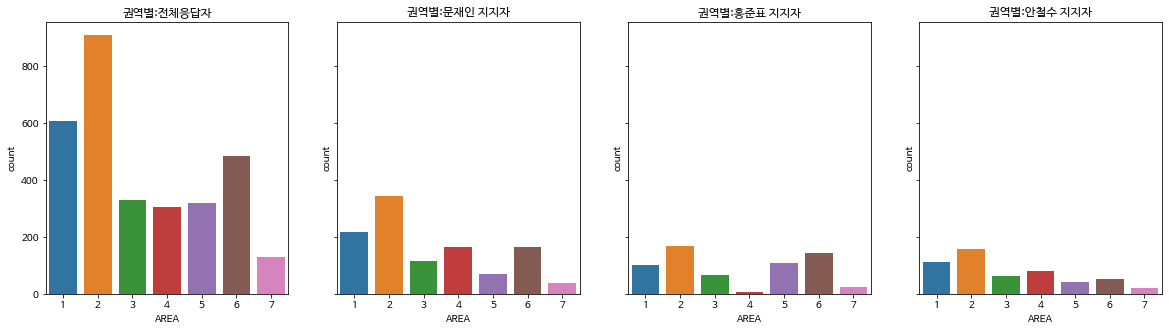

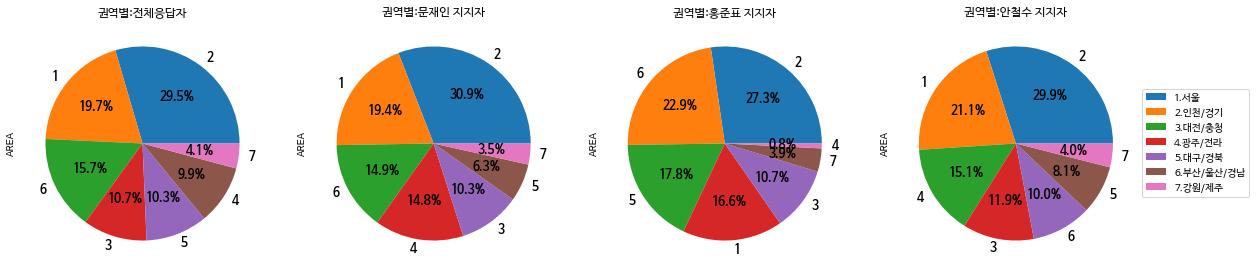

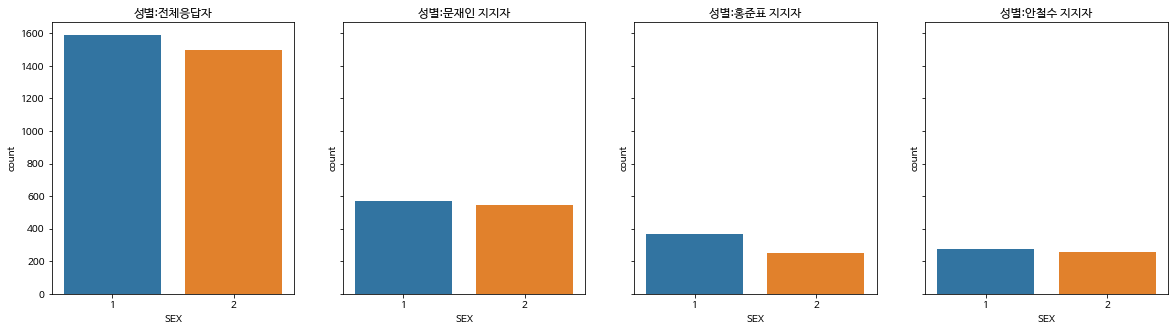

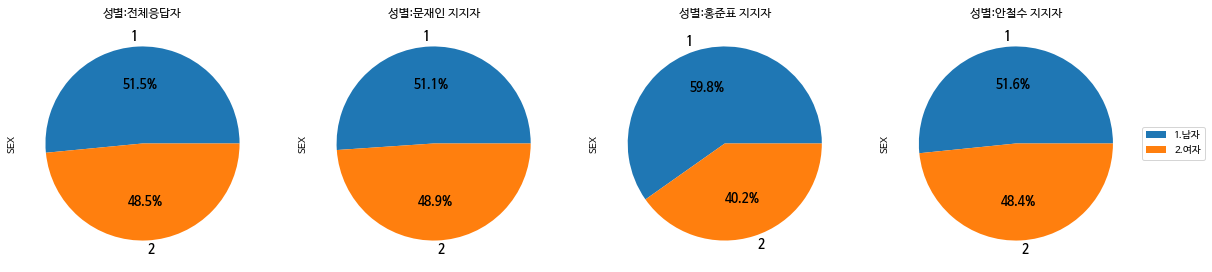

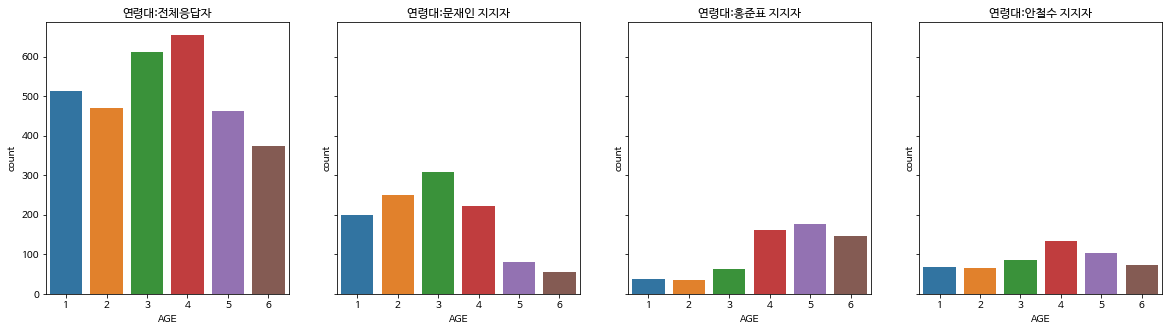

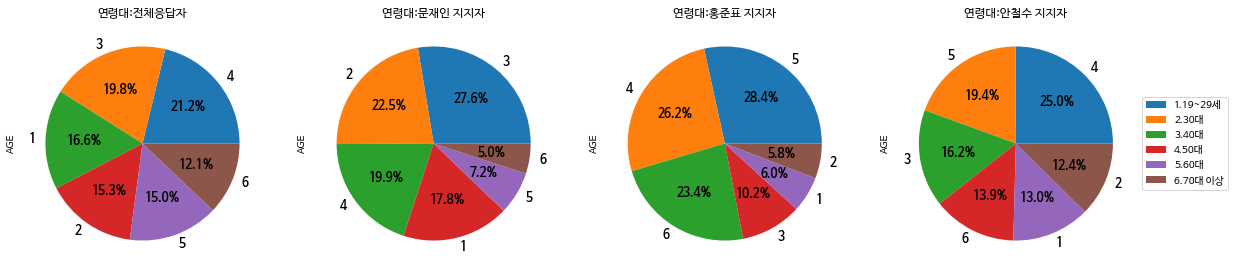

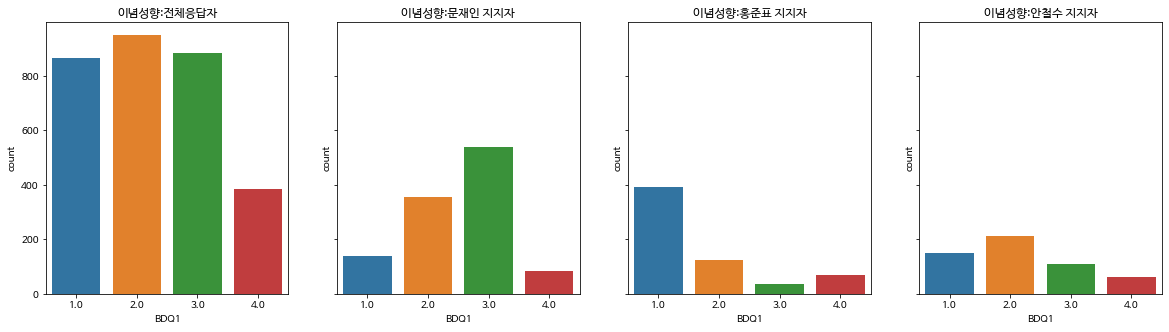

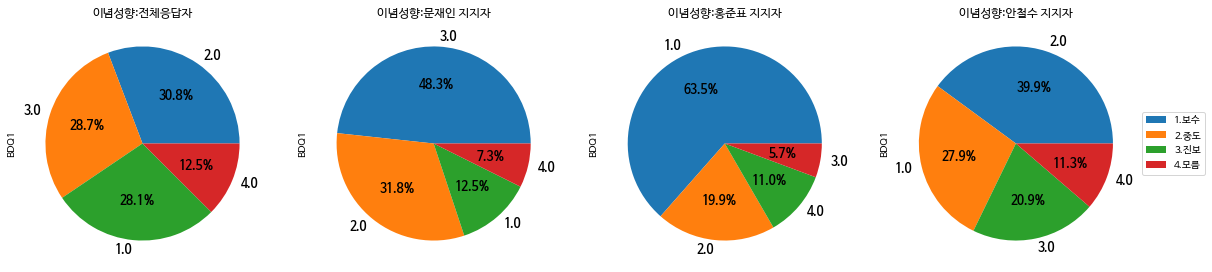

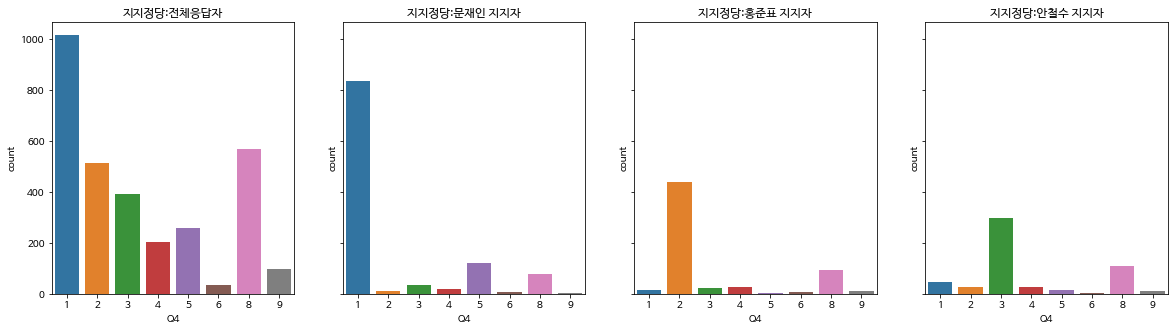

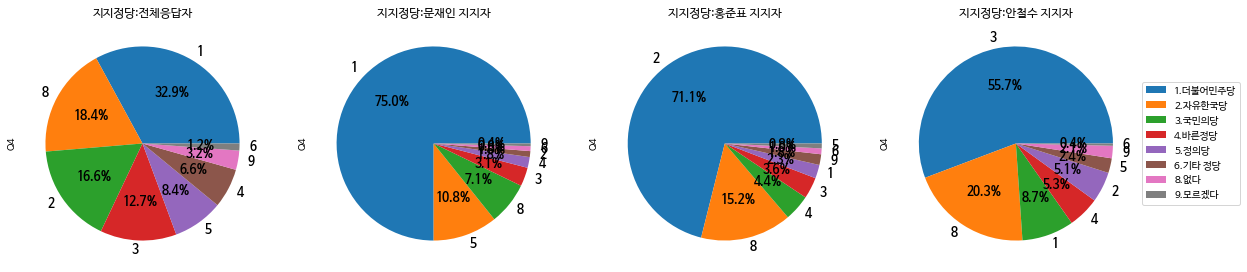

In [ ]:

######################################
## 권역별
f, axes=plt.subplots(1, 4, figsize=(20, 5), sharex=False, sharey=True)
index=['1.서울','2.인천/경기','3.대전/충청','4.광주/전라','5.대구/경북','6.부산/울산/경남','7.강원/제주']
col=['blue','brown','custom','green','grey','orange','purple','red','silver','white','yellow']
axes[0].set_title('권역별:전체응답자',fontsize=12)
sns.countplot(data=df, x="AREA",ax=axes[0])
axes[1].set_title('권역별:문재인 지지자',fontsize=12)
sns.countplot(data=df_1, x="AREA",ax=axes[1])
axes[2].set_title('권역별:홍준표 지지자',fontsize=12)
sns.countplot(data=df_2, x="AREA", ax=axes[2])
axes[3].set_title('권역별:안철수 지지자',fontsize=12)
sns.countplot(data=df_3, x="AREA", ax=axes[3])
plt.show()

fig,axes=plt.subplots(1,4,figsize=(20,10))
index=['1.서울','2.인천/경기','3.대전/충청','4.광주/전라','5.대구/경북','6.부산/울산/경남','7.강원/제주']
axes[0].set_title('권역별:전체응답자',fontsize=12)
df['AREA'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[0])
axes[1].set_title('권역별:문재인 지지자',fontsize=12)
df_1['AREA'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[1])
axes[2].set_title('권역별:홍준표 지지자',fontsize=12)
df_2['AREA'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[2])
axes[3].set_title('권역별:안철수 지지자',fontsize=12)
df_3['AREA'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[3])
plt.legend(index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


######################################
## 성별
f, axes=plt.subplots(1, 4, figsize=(20, 5), sharex=False, sharey=True)
index=['1.남자', '2.여자']
col=['blue','brown','custom','green','grey','orange','purple','red','silver','white','yellow']
axes[0].set_title('성별:전체응답자',fontsize=12)
sns.countplot(data=df, x="SEX",ax=axes[0])
axes[1].set_title('성별:문재인 지지자',fontsize=12)
sns.countplot(data=df_1, x="SEX",ax=axes[1])
axes[2].set_title('성별:홍준표 지지자',fontsize=12)
sns.countplot(data=df_2, x="SEX", ax=axes[2])
axes[3].set_title('성별:안철수 지지자',fontsize=12)
sns.countplot(data=df_3, x="SEX", ax=axes[3])
plt.show()

fig,axes=plt.subplots(1,4,figsize=(20,10))
index=['1.남자', '2.여자']
axes[0].set_title('성별:전체응답자',fontsize=12)
df['SEX'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[0])
axes[1].set_title('성별:문재인 지지자',fontsize=12)
df_1['SEX'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[1])
axes[2].set_title('성별:홍준표 지지자',fontsize=12)
df_2['SEX'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[2])
axes[3].set_title('성별:안철수 지지자',fontsize=12)
df_3['SEX'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[3])
plt.legend(index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


######################################
## 연령대
f, axes=plt.subplots(1, 4, figsize=(20, 5), sharex=False, sharey=True)
index=['1.19~29세', '2.30대', '3.40대', '4.50대', '5.60대', '6.70대 이상']
col=['blue','brown','custom','green','grey','orange','purple','red','silver','white','yellow']
axes[0].set_title('연령대:전체응답자',fontsize=12)
sns.countplot(data=df, x="AGE",ax=axes[0])
axes[1].set_title('연령대:문재인 지지자',fontsize=12)
sns.countplot(data=df_1, x="AGE",ax=axes[1])
axes[2].set_title('연령대:홍준표 지지자',fontsize=12)
sns.countplot(data=df_2, x="AGE", ax=axes[2])
axes[3].set_title('연령대:안철수 지지자',fontsize=12)
sns.countplot(data=df_3, x="AGE", ax=axes[3])
plt.show()

fig,axes=plt.subplots(1,4,figsize=(20,10))
index=['1.19~29세', '2.30대', '3.40대', '4.50대', '5.60대', '6.70대 이상']
axes[0].set_title('연령대:전체응답자',fontsize=12)
df['AGE'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[0])
axes[1].set_title('연령대:문재인 지지자',fontsize=12)
df_1['AGE'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[1])
axes[2].set_title('연령대:홍준표 지지자',fontsize=12)
df_2['AGE'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[2])
axes[3].set_title('연령대:안철수 지지자',fontsize=12)
df_3['AGE'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[3])
plt.legend(index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


######################################
## 이념성향
f, axes=plt.subplots(1, 4, figsize=(20, 5), sharex=False, sharey=True)
index=['1.보수', '2.중도', '3.진보', '4.모름']
col=['blue','brown','custom','green','grey','orange','purple','red','silver','white','yellow']
axes[0].set_title('이념성향:전체응답자',fontsize=12)
sns.countplot(data=df, x="BDQ1",ax=axes[0])
axes[1].set_title('이념성향:문재인 지지자',fontsize=12)
sns.countplot(data=df_1, x="BDQ1",ax=axes[1])
axes[2].set_title('이념성향:홍준표 지지자',fontsize=12)
sns.countplot(data=df_2, x="BDQ1", ax=axes[2])
axes[3].set_title('이념성향:안철수 지지자',fontsize=12)
sns.countplot(data=df_3, x="BDQ1", ax=axes[3])
plt.show()

fig,axes=plt.subplots(1,4,figsize=(20,10))
index=['1.보수', '2.중도', '3.진보', '4.모름']
axes[0].set_title('이념성향:전체응답자',fontsize=12)
df['BDQ1'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[0])
axes[1].set_title('이념성향:문재인 지지자',fontsize=12)
df_1['BDQ1'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[1])
axes[2].set_title('이념성향:홍준표 지지자',fontsize=12)
df_2['BDQ1'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[2])
axes[3].set_title('이념성향:안철수 지지자',fontsize=12)
df_3['BDQ1'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[3])
plt.legend(index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


######################################
## 지지정당
f, axes=plt.subplots(1, 4, figsize=(20, 5), sharex=False, sharey=True)
index=['1.더불어민주당', '2.자유한국당', '3.국민의당', '4.바른정당', '5.정의당', '6.기타 정당', '8.없다', '9.모르겠다']
col=['blue','brown','custom','green','grey','orange','purple','red','silver','white','yellow']
axes[0].set_title('지지정당:전체응답자',fontsize=12)
sns.countplot(data=df, x="Q4",ax=axes[0])
axes[1].set_title('지지정당:문재인 지지자',fontsize=12)
sns.countplot(data=df_1, x="Q4",ax=axes[1])
axes[2].set_title('지지정당:홍준표 지지자',fontsize=12)
sns.countplot(data=df_2, x="Q4", ax=axes[2])
axes[3].set_title('지지정당:안철수 지지자',fontsize=12)
sns.countplot(data=df_3, x="Q4", ax=axes[3])
plt.show()

fig,axes=plt.subplots(1,4,figsize=(20,10))
index=['1.더불어민주당', '2.자유한국당', '3.국민의당', '4.바른정당', '5.정의당', '6.기타 정당', '8.없다', '9.모르겠다']
axes[0].set_title('지지정당:전체응답자',fontsize=12)
df['Q4'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[0])
axes[1].set_title('지지정당:문재인 지지자',fontsize=12)
df_1['Q4'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[1])
axes[2].set_title('지지정당:홍준표 지지자',fontsize=12)
df_2['Q4'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[2])
axes[3].set_title('지지정당:안철수 지지자',fontsize=12)
df_3['Q4'].value_counts().plot.pie(autopct='%.1f%%', textprops={'fontsize':12, 'weight':'bold'}, ax=axes[3])
plt.legend(index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# => 지지후보별 높은 응답 데이터 정리

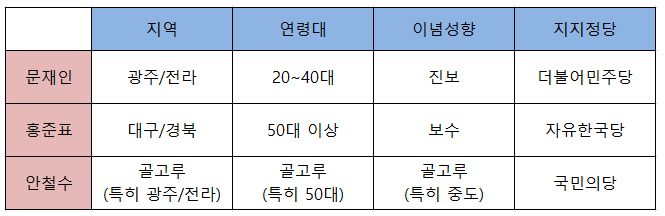

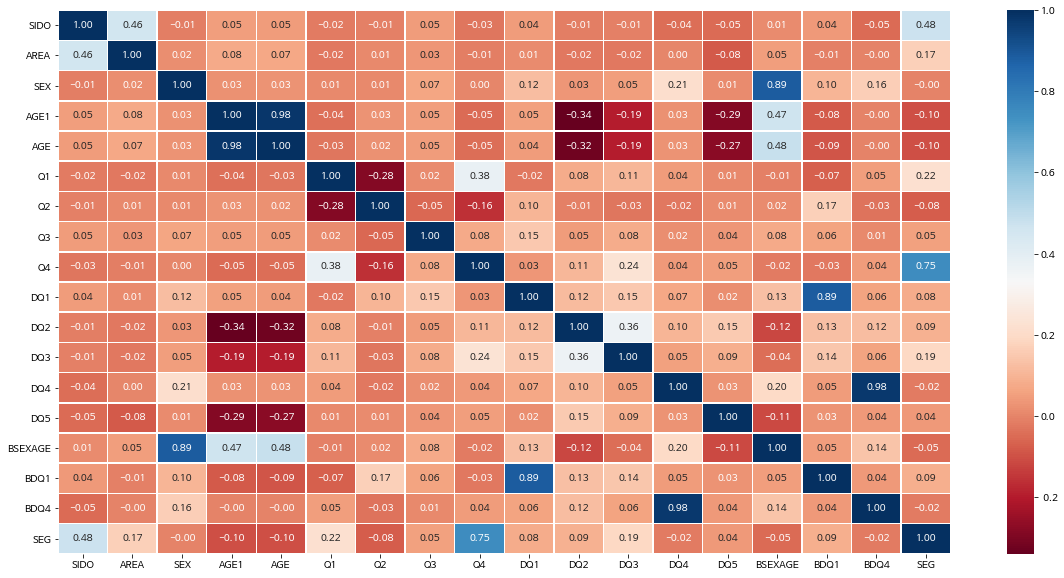

In [ ]:
#######################################################################################
## 상관계수 그래프 => Q2, Q3변수는 TEST 데이터에 응답이 없어서 모델돌릴때 삭제할 예정
#######################################################################################
df22 = df[df.TYPE == 1]
df22 = df22.drop(columns = ['ID', 'TYPE'])

# 전체데이터 기준
corr = df22.corr()
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot = True, fmt ='.2f', linewidths=.5, cmap='RdBu')
plt.show()

In [ ]:
#######################################################################################
## 다중공선성 확인
#######################################################################################

df33 = df[df.TYPE == 1]
df33 = df33.drop(columns = ['ID', 'TYPE', 'Q2', 'Q3'])

# 지지후보 응답자 기준
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df33.columns    
vif['vif'] = [variance_inflation_factor(
             df33.values, i) for i in range(df33.shape[1])]
vif.sort_values(by='vif',ascending=False)

,Features,vif
4,AGE,223.224944
2,SEX,164.560021
12,BSEXAGE,106.254262
3,AGE1,25.574487
10,DQ4,24.076133
14,BDQ4,23.710797
15,SEG,6.092196
13,BDQ1,5.636196
7,DQ1,5.551146
6,Q4,5.113313


In [ ]:
## 다중공선성 재확인 =>  vif가 10이상이면 다중공선성이 존재하는데, SEX, AGE1, AGE, BSEXAGE 4개 독립변수가 다중공선성 문제가 보임
df44 = df[df.TYPE == 1]
df44 = df44.drop(columns = ['ID', 'TYPE', 'AGE1', 'SEX', 'Q2', 'Q3', 'DQ1', 'DQ4'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df44.columns
vif['vif'] = [variance_inflation_factor(
             df44.values, i) for i in range(df44.shape[1])]
vif.sort_values(by='vif',ascending=False)

,Features,vif
11,SEG,24.593619
4,Q4,13.112657
0,SIDO,9.416706
10,BDQ4,6.845122
2,AGE,6.824488
9,BDQ1,5.823501
8,BSEXAGE,5.753968
1,AREA,4.827643
3,Q1,4.302076
6,DQ3,3.135573


In [ ]:
## 다중공선성 재확인 =>  vif가 10이상이면 다중공선성이 존재하는데, SEG 독립변수가 다중공선성 문제가 보임
df55 = df[df.TYPE == 1]
df55 = df55.drop(columns = ['ID', 'TYPE', 'SEX', 'AGE1', 'Q2', 'Q3', 'DQ1', 'DQ4', 'SEG'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df55.columns
vif['vif'] = [variance_inflation_factor(
             df55.values, i) for i in range(df55.shape[1])]
vif.sort_values(by='vif',ascending=False)

,Features,vif
10,BDQ4,6.845002
2,AGE,6.723444
8,BSEXAGE,5.753967
9,BDQ1,5.487408
1,AREA,4.784120
3,Q1,4.242030
0,SIDO,4.043213
4,Q4,3.229976
6,DQ3,3.135512
7,DQ5,2.945329


================================================================================
## 모델 적용하기
================================================================================

In [ ]:
##################################################
## 데이터 다시 불러와서 모델 실행

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/_project/전화조사데이터.xlsx')


##################################################
## 99 '모르겠다' 값이 14개 있는데, 사례수도 적고, 모델에서는 극단치로 인식할것 같아 13 '기타'로 데이터 수정
df.loc[(df.DQ4==99),'DQ4']=13
df['DQ4'].value_counts()


##################################################
## 타켓변수가 결측치이면 모델이 돌아가지 않아서 우선 결측치 9로 채움.
# df = df.fillna(9)
# df['Q1'] = df['Q1'].fillna(df['Q1']==9)

##################################################
## 성(SEX) & 연령(AGE) 으로 성연령(BSEXAGE) 변수 생성
df.loc[(df.SEX==1) & (df.AGE==1),'BSEXAGE']=1     #1.남-20대
df.loc[(df.SEX==1) & (df.AGE==2),'BSEXAGE']=2     #2.남-30대
df.loc[(df.SEX==1) & (df.AGE==3),'BSEXAGE']=3     #3.남-40대
df.loc[(df.SEX==1) & (df.AGE==4),'BSEXAGE']=4     #4.남-50대
df.loc[(df.SEX==1) & (df.AGE==5),'BSEXAGE']=5     #5.남-60대
df.loc[(df.SEX==1) & (df.AGE==6),'BSEXAGE']=6     #6.남-70대 이상

df.loc[(df.SEX==2) & (df.AGE==1),'BSEXAGE']=7     #7.여-20대
df.loc[(df.SEX==2) & (df.AGE==2),'BSEXAGE']=8     #8.여-30대
df.loc[(df.SEX==2) & (df.AGE==3),'BSEXAGE']=9     #9.여-40대
df.loc[(df.SEX==2) & (df.AGE==4),'BSEXAGE']=10    #10.여-50대
df.loc[(df.SEX==2) & (df.AGE==5),'BSEXAGE']=11    #11.여-60대
df.loc[(df.SEX==2) & (df.AGE==6),'BSEXAGE']=12    #12.여-70대 이상


## DQ1(정치이념성향) 세부적인 분류를 묶어서 변수 생성
df.loc[(df.DQ1==1) | (df.DQ1==2),'BDQ1']=1   #1.보수(매우 보수/보수)
df.loc[(df.DQ1==3),'BDQ1']=2                 #2.중도
df.loc[(df.DQ1==4) | (df.DQ1==5),'BDQ1']=3   #3.진보(매우 진보/진보)
df.loc[(df.DQ1==9),'BDQ1']=4                 #4.모름


## DQ4(직업) 세부적인 분류를 묶어서 변수 생성
df.loc[(df.DQ4==1),'BDQ4']=1                                   #1.농/임/어업
df.loc[(df.DQ4==2),'BDQ4']=2                                   #2.자영업
df.loc[(df.DQ4==3) | (df.DQ4==4) | (df.DQ4==5),'BDQ4']=3       #3.블루칼라
df.loc[(df.DQ4==6) | (df.DQ4==7) | (df.DQ4==8),'BDQ4']=4       #4.화이트칼라
df.loc[(df.DQ4==9),'BDQ4']=5                                   #5.가정주부
df.loc[(df.DQ4==10),'BDQ4']=6                                  #6.학생
df.loc[(df.DQ4==11) | (df.DQ4==12) | (df.DQ4==13),'BDQ4']=7    #7.무직/은퇴/기타
df.loc[(df.DQ4==99),'BDQ4']=8                                  #8.모름


## 세그먼트 추가변수생성
# segment 1
df.loc[(df.SIDO==1) & (df.Q4==1),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==1),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==1),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==1),'SEG']=1

df.loc[(df.SIDO==1) & (df.Q4==2),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==2),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==2),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==2),'SEG']=1

df.loc[(df.SIDO==1) & (df.Q4==3),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==3),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==3),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==3),'SEG']=1

df.loc[(df.SIDO==1) & (df.Q4==4),'SEG']=1
df.loc[(df.SIDO==2) & (df.Q4==4),'SEG']=1
df.loc[(df.SIDO==3) & (df.Q4==4),'SEG']=1
df.loc[(df.SIDO==4) & (df.Q4==4),'SEG']=1

# segment 2
df.loc[(df.SIDO==5) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==1),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==1),'SEG']=2

df.loc[(df.SIDO==5) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==2),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==2),'SEG']=2

df.loc[(df.SIDO==5) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==3),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==3),'SEG']=2

df.loc[(df.SIDO==5) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==6) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==7) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==8) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==9) & (df.Q4==4),'SEG']=2
df.loc[(df.SIDO==10) & (df.Q4==4),'SEG']=2

# segment 3
df.loc[(df.SIDO==11) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==1),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==1),'SEG']=3

df.loc[(df.SIDO==11) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==2),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==2),'SEG']=3

df.loc[(df.SIDO==11) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==3),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==3),'SEG']=3

df.loc[(df.SIDO==11) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==12) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==13) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==14) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==15) & (df.Q4==4),'SEG']=3
df.loc[(df.SIDO==16) & (df.Q4==4),'SEG']=3

# segment 4
df.loc[(df.SIDO==1) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==5),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==5),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==6),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==6),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==7),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==7),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==8),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==8),'SEG']=4

df.loc[(df.SIDO==1) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==2) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==3) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==4) & (df.Q4==9),'SEG']=4
df.loc[(df.SIDO==5) & (df.Q4==9),'SEG']=4

# segment 5
df.loc[(df.SIDO==6) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==5),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==5),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==6),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==6),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==7),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==7),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==8),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==8),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==8),'SEG']=5

df.loc[(df.SIDO==6) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==7) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==8) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==9) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==10) & (df.Q4==9),'SEG']=5
df.loc[(df.SIDO==11) & (df.Q4==9),'SEG']=5

# segment 6
df.loc[(df.SIDO==12) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==5),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==5),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==6),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==6),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==7),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==7),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==8),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==8),'SEG']=6

df.loc[(df.SIDO==12) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==13) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==14) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==15) & (df.Q4==9),'SEG']=6
df.loc[(df.SIDO==16) & (df.Q4==9),'SEG']=6

##################################################
## 지지후보 응답데이터 : 2757
df1 = df[df.TYPE == 1]
df1 = df1.drop(columns = ['ID', 'TYPE', 'SEX', 'AGE1', 'Q2', 'Q3', 'DQ1', 'DQ4', 'SEG'])

## 지지후보 없음/무응답데이터 : 329
df2 = df[df.TYPE == 2]
df2 = df2.drop(columns = ['ID', 'TYPE', 'SEX', 'AGE1', 'Q2', 'Q3', 'DQ1', 'DQ4', 'SEG'])

## 예측한 데이터 ID통합용 데이터
df3 = df[df.TYPE == 2]

df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2757 entries, 0 to 3085
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SIDO     2757 non-null   int64  
 1   AREA     2757 non-null   int64  
 2   AGE      2757 non-null   int64  
 3   Q1       2757 non-null   int64  
 4   Q4       2757 non-null   int64  
 5   DQ2      2757 non-null   int64  
 6   DQ3      2757 non-null   int64  
 7   DQ5      2757 non-null   int64  
 8   BSEXAGE  2757 non-null   float64
 9   BDQ1     2757 non-null   float64
 10  BDQ4     2757 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 258.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 3 to 3077
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SIDO     329 non-null    int64  
 1   AREA     329 non-null    int64  
 2   AGE      329 non-null    int64  
 3   Q1       329 non-null    int64  
 4   Q4      

In [ ]:
##################################################
## 지지후보 응답데이터로 train, test 나누기

train = df1.drop('Q1', axis = 1)
test = df1['Q1']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state =42)


In [ ]:
#######################################################################################
## 분류모델 여러가지 적용해서 accuracy 확인
#######################################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Xgboost" : XGBClassifier(),
    'lightgbm' : LGBMClassifier(),
}

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=kfold)
    print("-----------------------------------------------------------------")
    print(classifier.__class__.__name__, "- accuracy score : ", round(score.mean(), 4))
    print("-----------------------------------------------------------------")

-----------------------------------------------------------------
LogisticRegression - accuracy score :  0.493
-----------------------------------------------------------------
-----------------------------------------------------------------
KNeighborsClassifier - accuracy score :  0.517
-----------------------------------------------------------------
-----------------------------------------------------------------
DecisionTreeClassifier - accuracy score :  0.5673
-----------------------------------------------------------------
-----------------------------------------------------------------
RandomForestClassifier - accuracy score :  0.6739
-----------------------------------------------------------------
-----------------------------------------------------------------
AdaBoostClassifier - accuracy score :  0.6109
-----------------------------------------------------------------
-----------------------------------------------------------------
XGBClassifier - accuracy score :  0.

================================================================================
## XGBoost Hypter Parameter 튜닝
=> https://injo.tistory.com/44?category=1068433

=> https://statkclee.github.io/model/model-python-xgboost-hyper.html

=> https://hwi-doc.tistory.com/entry/%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0-%EC%82%AC%EC%9A%A9%ED%95%98%EC%9E%90-XGBoost

================================================================================


In [ ]:
#######################################################################################
## XGBClassifier 모델선택 => 하이퍼파라메타 튜닝하기
#######################################################################################

## XGBClassifier : 하이퍼 파라미터 튜닝(방법1)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model 평가
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
print(xgb_clf)

hr_accuracy_list = []

max_depth_list = [2, 3, 4, 5, 6]
subsample_list = [0.6, 0.7, 0.8, 0.9, 1.0]

def hr_grid_search(max_depth, subsample): 
    xgb_model = xgb.XGBClassifier(max_depth=max_depth,
                              subsample=subsample)
    xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
    return([max_depth, subsample, accuracy_score(y_test, xgb_pred)])

for max_depth in max_depth_list:
    for subsample in subsample_list:
        hr_accuracy_list.append(hr_grid_search(max_depth, subsample))
    
hr_xgb_df = pd.DataFrame(hr_accuracy_list, columns=['depth', 'subsample', 'accuracy'])
hr_xgb_df.head() 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


,depth,subsample,accuracy
0,2,0.6,0.751812
1,2,0.7,0.740942
2,2,0.8,0.746377
3,2,0.9,0.740942
4,2,1.0,0.735507


In [ ]:
## XGBClassifier : 하이퍼 파라미터 튜닝(방법2)

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state =42)


xgb = XGBClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [2, 3, 4, 5, 6],
              'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0]}

grid_xgb = GridSearchCV(xgb, param_grid=parameters, cv=3, refit=True)

# 하이퍼 파라미터를 순차적으로 학습, 평가
grid_xgb.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 데이터 프레임으로 반환
scores_df = pd.DataFrame(grid_xgb.cv_results_)

print('GridSearch - XGB 최적 파라미터: ', grid_xgb.best_params_)
print('GridSearch - XGB 최고 점수: ', grid_xgb.best_score_)

# GridSearchCV의 refit으로 학습된 estimator 반환
estimator = grid_xgb.best_estimator_

# GridSearchCV의 best_estmator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('XGB 테스트 데이터세트 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))


GridSearch - XGB 최적 파라미터:  {'max_depth': 2, 'subsample': 1.0}
GridSearch - XGB 최고 점수:  0.709297052154195
XGB 테스트 데이터세트 정확도:  0.7355


In [ ]:
#######################################################################################
## XGBClassifier 모델 최적화
#######################################################################################

from xgboost import XGBClassifier
xgb_model = XGBClassifier(base_score=0.5,
                          booster='gbtree',
                          colsample_bylevel=1,
                          colsample_bynode=1,
                          colsample_bytree=1,           # 범위 0~1(크면 과적합 발생)    
                          gamma=0,                      # =>값을 높이면 과적합 제어
                          learning_rate=0.1,
                          max_delta_step=0,
                          max_depth=2,                  # 통상 3~10 적용(크면 과적합 발생)    
                          min_child_weight=1,           # =>값을 높이면 과적합 제어
                          missing=None,
                          n_estimators=100,
                          n_jobs=1,
                          nthread=None,
                          objective='multi:softmax',    # binary:logistic(이진 분류),  multi:softmax(다중 분류), multi-softprob(다중 확률)
                          random_state=42,
                          reg_alpha=0,
                          reg_lambda=1,
                          scale_pos_weight=1,
                          silent=None,
                          subsample=1.0,                # 통상 0.5~1 적용(과적합 제어)
                          verbosity=1)

xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.80      0.88      0.84       247
           2       0.84      0.86      0.85       120
           3       0.62      0.63      0.62       101
           4       0.46      0.36      0.41        36
           5       0.35      0.18      0.24        45
           6       0.00      0.00      0.00         3

    accuracy                           0.74       552
   macro avg       0.51      0.49      0.49       552
weighted avg       0.71      0.74      0.72       552



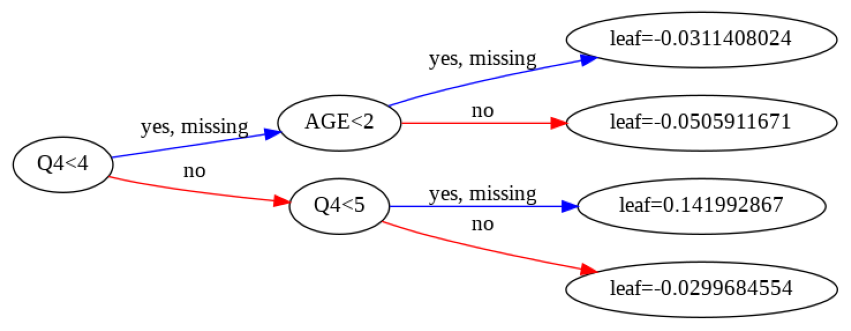

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(xgb_model, num_trees=3, rankdir='LR', ax=ax)


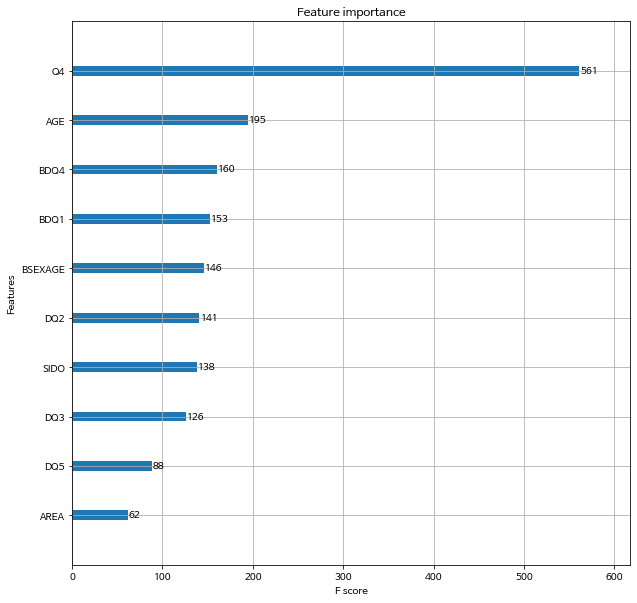

In [ ]:
## XGBoost 중요변수 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgb_model, ax=ax)



In [ ]:
#######################################################################################
##  XGBClassifier 모델로 지지후보 무응답 데이터 예측
#######################################################################################

X_train = df1.drop('Q1', axis = 1) # Q1 응답데이터
X_test = df1['Q1']

y_train = df2.drop('Q1', axis = 1) # Q1 무응답데이터
y_test = df2['Q1']

xgb_pred = xgb_model.fit(X_train, X_test).predict(y_train)   #원래소스 : xgb_model.fit(X_train, y_train).predict(X_test)
print(xgb_pred)


[4 3 3 2 3 3 1 5 2 1 1 1 1 3 3 3 2 2 1 2 3 5 3 2 2 2 3 2 4 2 3 1 3 3 4 1 2
 2 2 3 2 1 2 3 4 1 4 3 3 1 5 2 3 2 2 1 3 1 2 3 3 1 3 1 2 1 2 2 5 2 3 5 4 2
 1 5 2 5 3 3 1 3 1 4 2 1 2 2 5 3 3 3 1 5 2 2 1 3 3 1 3 5 1 3 2 1 3 1 1 2 1
 2 5 3 3 3 3 3 3 2 3 5 3 3 1 3 3 1 1 3 3 2 5 1 2 5 3 2 2 1 2 5 5 3 2 1 1 3
 3 3 1 2 3 1 3 3 1 4 2 2 5 1 1 3 3 5 1 2 5 3 3 1 5 3 2 1 3 1 3 2 5 3 2 2 1
 1 1 1 2 2 1 2 2 2 1 2 3 3 2 2 1 3 1 2 1 2 1 2 5 5 2 1 1 3 2 3 1 4 2 1 2 2
 2 4 2 4 1 3 5 3 3 5 2 3 3 1 2 3 5 5 1 1 3 5 3 5 3 5 2 1 2 1 3 3 2 5 3 1 5
 2 1 5 2 5 3 5 1 5 3 2 5 1 1 2 1 1 5 3 1 1 5 5 3 5 2 2 2 2 3 1 2 3 2 1 2 3
 2 1 2 4 3 2 5 2 1 1 3 1 5 3 2 5 3 1 4 3 2 3 2 2 3 5 3 1 2 3 5 3 2]


In [ ]:
## ID와 Q1 예측값 결합해서 데이터 생성

submission = {'ID':df3['ID'], 'Q1':xgb_pred}
submission = pd.DataFrame(submission)
submission.info()
submission.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 3 to 3077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      329 non-null    int64
 1   Q1      329 non-null    int64
dtypes: int64(2)
memory usage: 7.7 KB


,ID,Q1
3,4,4
14,15,3
15,16,3
16,17,2
29,30,3
41,42,3
48,49,1
66,67,5
67,68,2
71,72,1


In [ ]:
## Q1 예측값 엑셀파일 저장

submission.to_excel('/content/drive/MyDrive/_project/submission.xlsx')

================================================================================
## 추가연구 (보팅/스태킹)
================================================================================

In [ ]:
#######################################################################################
##  보팅적용
#######################################################################################

#!pip install catboost

In [ ]:
train = df1.drop('Q1', axis = 1)
test = df1['Q1']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state =42)


###############################################
## LGBMClassifier : 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

## 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [2, 3, 4, 5, 6],
              'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0]}

grid_lgbm = GridSearchCV(lgbm, param_grid=parameters, cv=3, refit=True)

# 하이퍼 파라미터를 순차적으로 학습, 평가
grid_lgbm.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 데이터 프레임으로 반환
scores_df = pd.DataFrame(grid_lgbm.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearch - lgbm 최적 파라미터: ', grid_lgbm.best_params_)
print('GridSearch - lgbm 최고 점수: ', grid_lgbm.best_score_)

# GridSearchCV의 refit으로 학습된 estimator 반환
estimator = grid_lgbm.best_estimator_

# GridSearchCV의 best_estmator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('lgbm 테스트 데이터세트 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

GridSearch - lgbm 최적 파라미터:  {'max_depth': 3, 'subsample': 0.6}
GridSearch - lgbm 최고 점수:  0.7061224489795919
lgbm 테스트 데이터세트 정확도:  0.7446


In [ ]:
train2 = df1.drop('Q1', axis = 1)
test2 = df1['Q1']

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train2, test2, test_size = 0.2, random_state =42)


# 개별 모델
xgb_clf = XGBClassifier(objective='multi:softmax', max_depth=2, subsample=1.0, random_state =42)
lgbm_clf = LGBMClassifier(objective='multi:softmax', max_depth=3, subsample=0.6, random_state =42)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(estimators=[('XGB', xgb_clf), ('LGBM', lgbm_clf)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [xgb_clf, lgbm_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.7428
XGBClassifier 정확도: 0.7355
LGBMClassifier 정확도: 0.7446


In [ ]:
#######################################################################################
##  stacking 적용
#######################################################################################
!pip install vecstack


In [ ]:
from vecstack import stacking
models = [XGBClassifier(objective='multi:softmax', max_depth=2, subsample=1.0, random_state =42),
          LGBMClassifier(objective='multi:softmax', max_depth=3, subsample=0.6, random_state =42),
          RandomForestClassifier(random_state = 42)]

S_train, S_test = stacking(models, X_train, y_train, X_test, regression = False, metric = ['acc'], n_folds = 5)
rfg = RandomForestClassifier()
rfg.fit(S_train, y_train)
stack_y_pred = rfg.predict(S_test)
np.mean(stack_y_pred == y_test)

0.7409420289855072